In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Get a list of column names and types

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Get a list of column names and types

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
#columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


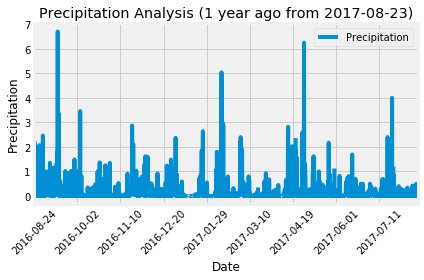

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date)
#week_ago = dt.date.today() - dt.timedelta(days=7)
one_year_ago=dt.date(2017,8,23) -dt.timedelta(days=365)
#one_year_ago=dt.date(latest_date,'%y-%m-%d') -dt.timedelta(days=365)

print(one_year_ago)
# Perform a query to retrieve the data and precipitation scores
prec_date =session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date <= '2017-08-23').filter(Measurement.date>'2016-08-23').order_by(Measurement.date).all() 

#for d in prec_date:
#       print(d)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prec_date, columns=['date','prcp'])
#df.dropna()
df.set_index('date').head()
#df.head()
 # Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Analysis (1 year ago from 2017-08-23)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
# Save an image of the chart and print it to the screen
plt.savefig("Images/Precipitation Analysis.png")
plt.show()
df.describe()

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [15]:
# list station name with ID
stations = session.query(Station.name, Station.station).order_by(Station.name).all()
print(stations)



[('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918'), ('KANEOHE 838.1, HI US', 'USC00513117'), ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'), ('MANOA LYON ARBO 785.2, HI US', 'USC00516128'), ('PEARL CITY, HI US', 'USC00517948'), ('UPPER WAHIAWA 874.3, HI US', 'USC00518838'), ('WAIHEE 837.5, HI US', 'USC00519281'), ('WAIKIKI 717.2, HI US', 'USC00519397'), ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523')]


In [16]:
#query for the dates and temperature observations from a year from the last data point.
tob = session.query(Measurement.date, Measurement.tobs).\
              filter(Measurement.date > one_year_ago).\
                order_by(Measurement.date).all()
#print(tob)

In [17]:
# Design a query to show how many stations are available in this dataset?
station_no=session.query(Measurement).group_by(Measurement.station).count()
print(station_no)

9


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                   order_by(func.count(Measurement.station).desc()).all()
print(active_station)
active_sttion_df = pd.DataFrame(active_station, columns=['station', 'count'])
active_sttion_df

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = session.query(Measurement.station,Station.name,func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                   order_by(func.count(Measurement.station).desc()).first()
print(most_active_station)

('USC00519281', 'WAIKIKI 717.2, HI US', 24948)


In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_tob = session.query(Measurement.station, Measurement.tobs).\
            filter(Measurement.station == 'USC00519281').\
            filter(Measurement.date>=one_year_ago).\
            order_by(Measurement.date).all()
max_tob_df=pd.DataFrame(max_tob)
max_tob_df.head()


,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


In [21]:
all_temp = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date >= one_year_ago).all()
all_temp

[(58.0, 74.59058295964125, 87.0)]

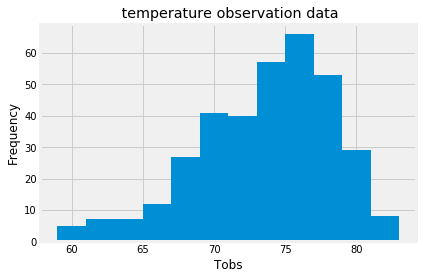

In [22]:
plt.hist(max_tob_df['tobs'],12)
plt.xlabel("Tobs")
plt.ylabel("Frequency")
plt.title(" temperature observation data")
plt.savefig("Images/tob.png")
plt.show()

![precipitation](Images/station-histogram.png)

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

start_date = dt.date(2018, 7, 28)
end_date = dt.date(2018, 8, 5)
previous_year = dt.timedelta(days=365)
tstart = start_date-previous_year
tend = end_date-previous_year
temp_pre_year = (calc_temps(tstart,tend))
print(temp_pre_year)


[(72.0, 79.11363636363636, 84.0)]


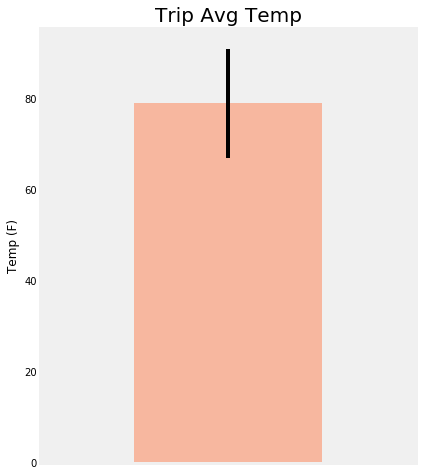

In [25]:
# Plot the results from your previous query as a bar chart. 
trip_df = pd.DataFrame(temp_pre_year, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
# Use the average temperature for the y value
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
# Use "Trip Avg Temp" as your Title
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.savefig("Images/tripavg.png")
plt.show()

In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
amt_rainfall = session.query(Measurement.station, func.sum(Measurement.prcp)).\
                     filter(Measurement.date>=tstart).\
                       filter(Measurement.date<=tend).\
                         group_by(Measurement.station).\
                       order_by(func.sum(Measurement.prcp).desc()).all()
for r in amt_rainfall:
    print(r)

('USC00516128', 1.31)
('USC00514830', 0.38)
('USC00519281', 0.38)
('USC00513117', 0.19)
('USC00519397', 0.04)
('USC00517948', 0.01)
('USC00519523', 0.0)


In [27]:
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
Results = session.query(*sel).filter(Measurement.station==Station.station).filter(Measurement.date>=tstart).filter(Measurement.date<=tend).\
            group_by(Measurement.station).\
            order_by(func.sum(Measurement.prcp).desc()).all()
for x in Results:
   print(x)

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 1.31, 21.3331, -157.8025, 152.4)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.38, 21.5213, -157.8374, 7.0)
('USC00519281', 'WAIHEE 837.5, HI US', 0.38, 21.45167, -157.84888999999998, 32.9)
('USC00513117', 'KANEOHE 838.1, HI US', 0.19, 21.4234, -157.8015, 14.6)
('USC00519397', 'WAIKIKI 717.2, HI US', 0.04, 21.2716, -157.8168, 3.0)
('USC00517948', 'PEARL CITY, HI US', 0.01, 21.3934, -157.9751, 11.9)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.0, 21.33556, -157.71139, 19.5)


## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

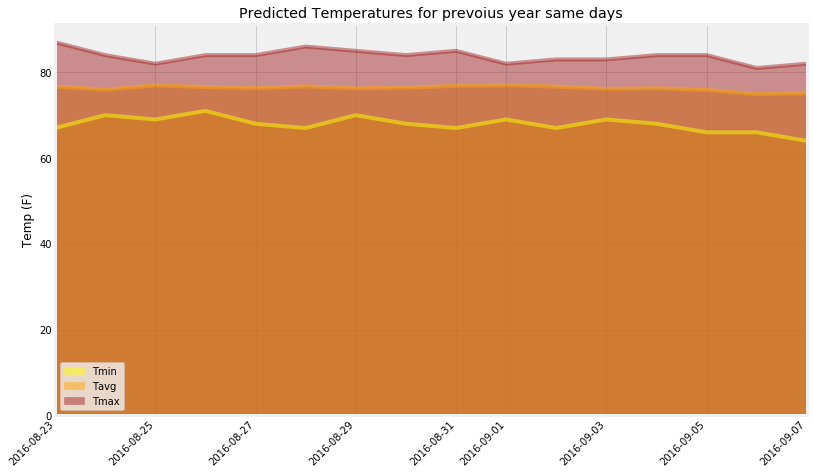

In [29]:
'''Calculate the Daily Normals'''
#create a function called daily_normals that will calculate the daily normals for a specific date
def daily_normals(day_date):
   temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                         filter(func.strftime("%m-%d", Measurement.date) == day_date).all()
   return temps
trip_start=dt.date(2016,8,23)
trip_end =dt.date(2016,9,7)
# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end)
# Stip off the year and save a list of %m-%d strings
trip_mmdd = trip_dates.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for trip_date in trip_mmdd:
   #append daily_normals
   normals.append(*daily_normals(trip_date))
# Load the previous query results into a Pandas DataFrame and add the trip_dates range as the date index
normals_df = pd.DataFrame(normals, columns = ['Tmin', 'Tavg', 'Tmax'])
#make the trip dates the index
normals_df['Date'] = trip_dates
normals_df = normals_df.set_index('Date')
#normals_df =pd.to_datetime(normals_df , errors = 'coerce')
# Plot the daily normals as an area plot with stacked=False
#make a colors list
colors = ['yellow','orange', 'brown']
#make an area plot for the predicted temps
normals_df.plot(kind='area', figsize=(12,8), stacked=False, x_compat=True, color=colors, title='Predicted Temperatures for prevoius year same days', rot=45)
#make the labels
plt.xlabel('')
plt.ylabel('Temp (F)')
plt.title('Predicted Temperatures for prevoius year same days')
plt.savefig('temppreyear.png')
plt.show()
